# Objectives

After completing this lab you will be able to:

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import plotly.express as px

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [2]:
import pandas as pd


def table_summary(data_frame: pd.DataFrame, only_missing_data=False):

    data_types = []
    for col in data_frame.columns:
        data_types.append(data_frame[col].dtypes)

    data_frame = data_frame.isnull()

    table = pd.DataFrame(
        columns=['Columns', 'Data_type', "Missing_data", "Available_data", "Total"])
    table = table.loc[:0]

    record = []
    missing_value = 0
    available = 0

    for i, column in enumerate(data_frame.columns.values.tolist()):
        type = data_types[i]
        for row in data_frame[column]:
            if row == True:
                missing_value += 1
            else:
                available += 1

        record.append(column)
        record.append(type)
        record.append(missing_value)
        record.append(available)
        record.append(missing_value + available)

        table.loc[len(table)] = record

        # reset
        missing_value = 0
        available = 0
        record = []
        type = ""

    if only_missing_data:
        return table[table['Missing_data'] > 0]
    else:
        return table


### Importing Data

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

df = pd.read_csv(URL)

In [4]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


# Creating Visualizations for Data Analysis

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year

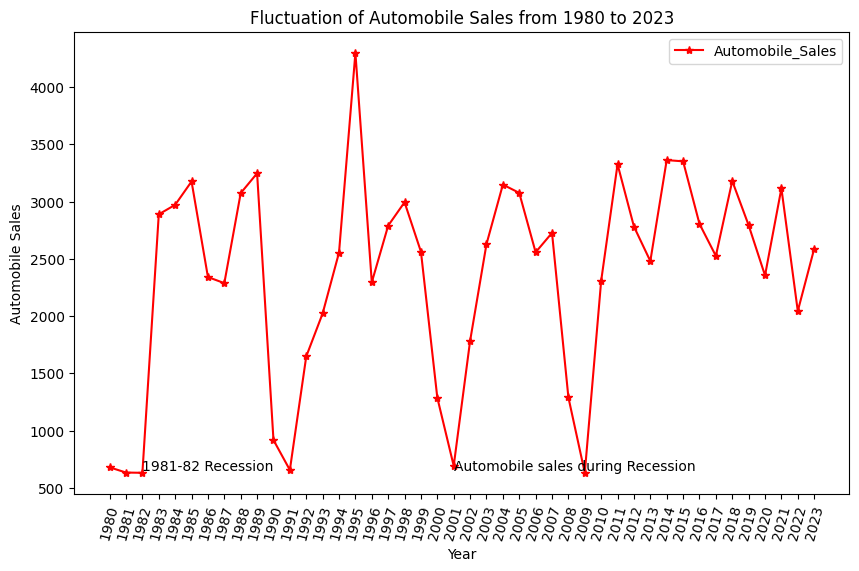

In [54]:
df_chart = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))

df_chart.plot(kind='line', c='red', marker='*')
plt.title(f'Fluctuation of Automobile Sales from {df_chart.index.min()} to {df_chart.index.max()}')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.text(2001, 650, 'Automobile sales during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend()
plt.show()

In [9]:
table_summary(df).sort_values('Columns')

,Columns,Data_type,Missing_data,Available_data,Total
7,Advertising_Expenditure,int64,0,528,528
12,Automobile_Sales,float64,0,528,528
14,City,object,0,528,528
8,Competition,int64,0,528,528
4,Consumer_Confidence,float64,0,528,528
0,Date,object,0,528,528
9,GDP,float64,0,528,528
10,Growth_Rate,float64,0,528,528
2,Month,object,0,528,528
6,Price,float64,0,528,528


####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [33]:
df['Vehicle_Type'].unique()

array(['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Executivecar'], dtype=object)

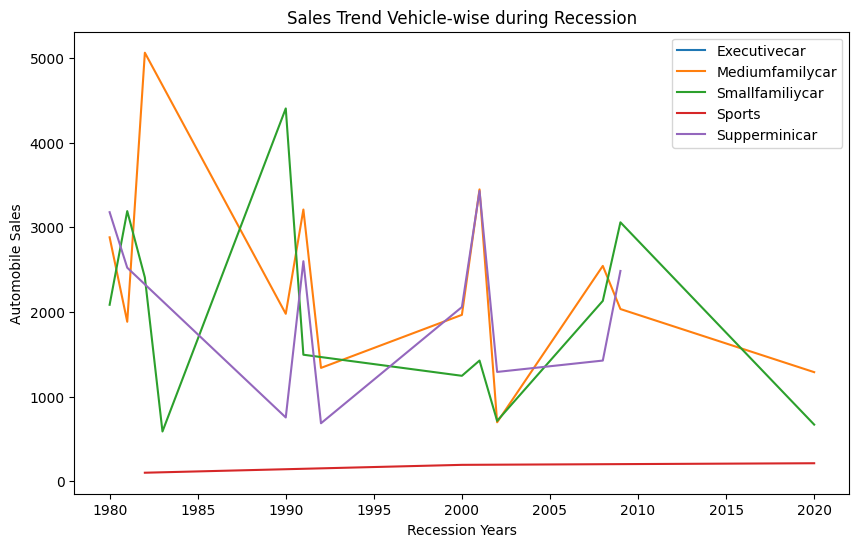

In [56]:
df_res = df[df['Recession'] == 1]

df_res = df_res.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

df_res.set_index('Year', inplace=True)

plt.figure(figsize=(10, 6))
df_res.groupby('Vehicle_Type')['Automobile_Sales'].plot(kind='line')

plt.xlabel('Recession Years')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

<details>
    <summary>Inference</summary>
<p>
Inference:
From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.<br>while sales of the superminicar and smallfamilycar increased.<br><br>
    </p>
    </details>

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


<Axes: xlabel='Vehicle_Type', ylabel='Automobile_Sales'>

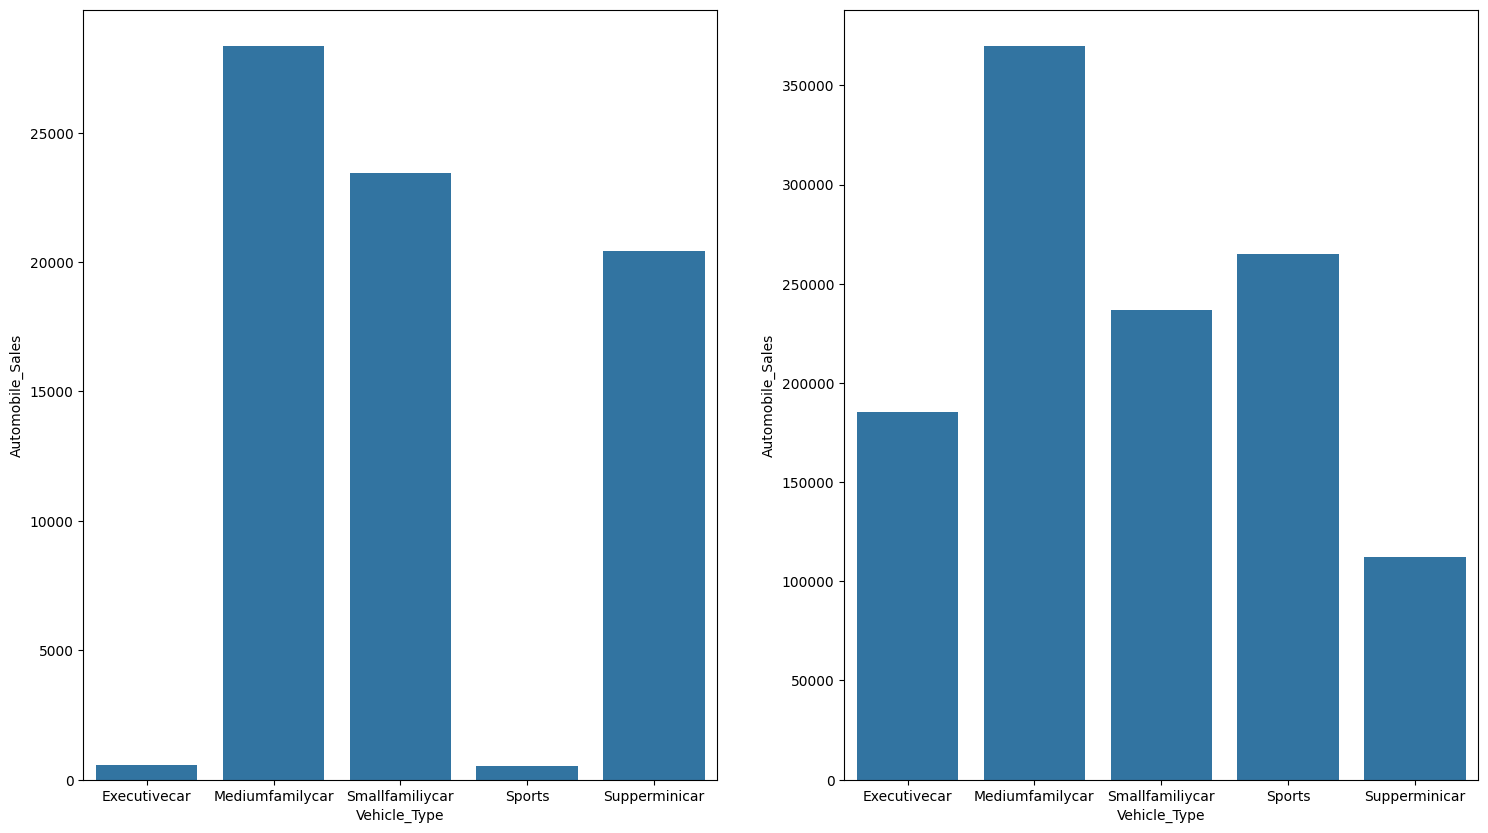

In [67]:
df_res = df[df['Recession'] == 1]
df_not_res = df[df['Recession'] == 0]

df_res = df_res.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
df_not_res = df_not_res.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

fig = plt.figure(figsize=(18, 10))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.barplot(df_res, x='Vehicle_Type', y='Automobile_Sales', ax=ax0)
sns.barplot(df_not_res, x='Vehicle_Type', y='Automobile_Sales', ax=ax1)

ax0.title()

([<matplotlib.axis.XTick at 0x1abf6604fb0>,
 [Text(0, 0, 'Non-Recession'), Text(1, 0, 'Recession')])

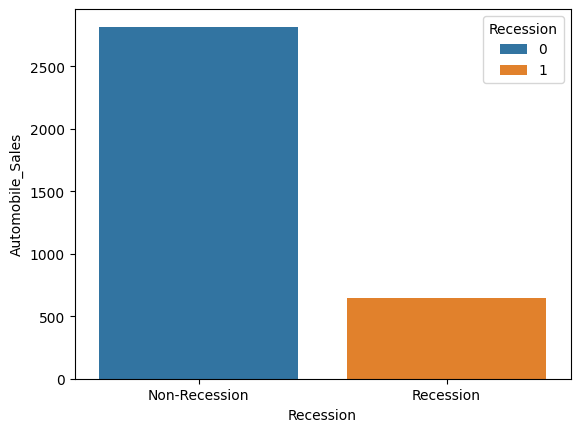

In [72]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

sns.barplot(new_df, x='Recession', y='Automobile_Sales', hue='Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

In [78]:
recession_data = df[df['Recession'] == 1]   

dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

res_data = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

dd

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222
5,1,Executivecar,564.000000
6,1,Mediumfamilycar,674.847619
7,1,Smallfamiliycar,650.733333
8,1,Sports,170.333333
9,1,Supperminicar,659.270968


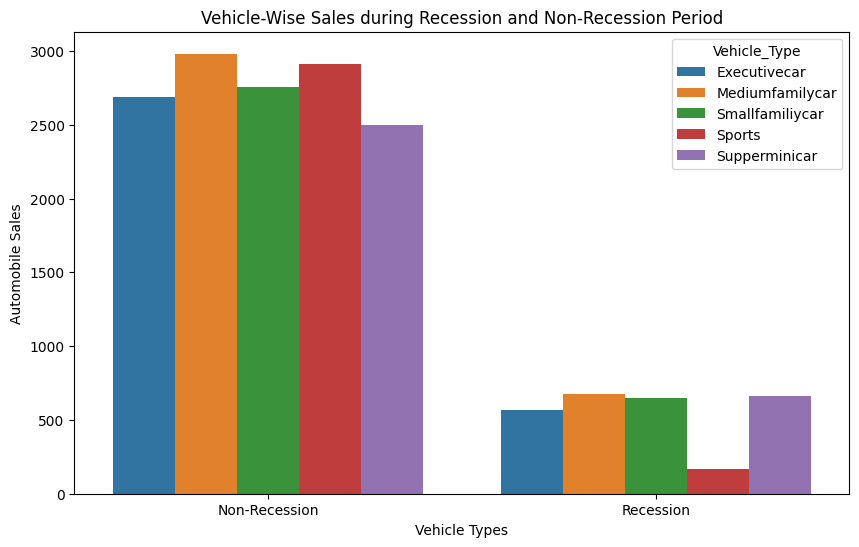

In [156]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Vehicle Types')
plt.ylabel('Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.

Text(0.5, 1.0, 'GDP Variation during Non Recession Period')

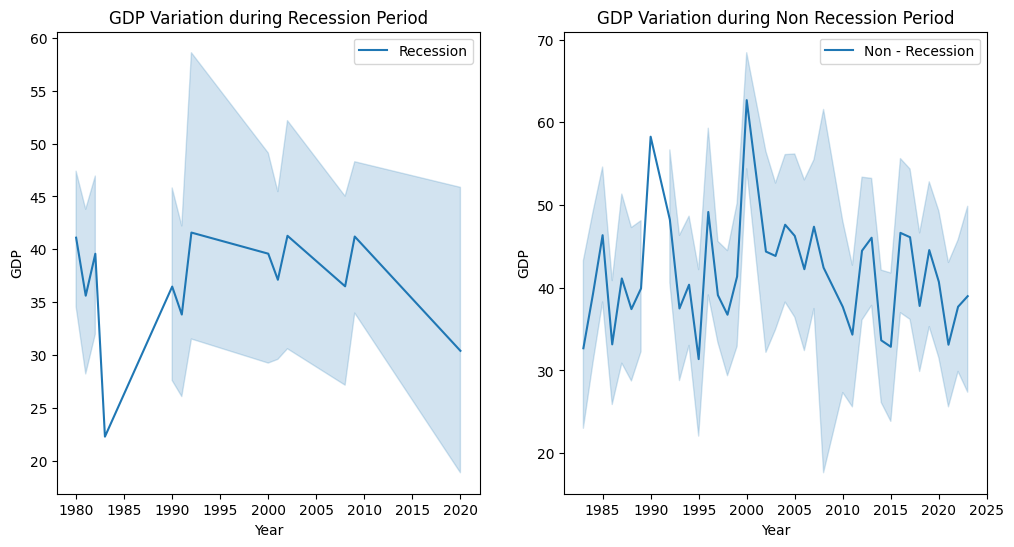

In [89]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.lineplot(data=rec_data, x='Year', y='GDP', label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(data=non_rec_data, x='Year', y='GDP', label='Non - Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')

### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'

Text(0.5, 1.0, 'Seasonality impact on Automobile Sales')

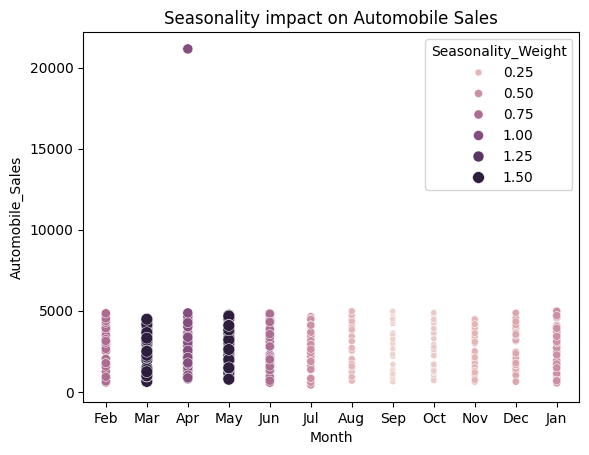

In [96]:
non_rec_data = df[df['Recession'] == 0]

size = non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight')

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


Text(0.5, 0, 'Customer Confidence')

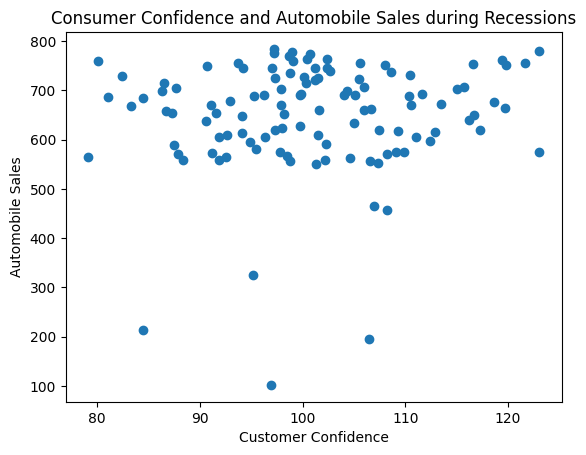

In [97]:
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.ylabel("Automobile Sales")
plt.xlabel("Customer Confidence")

 #### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

Text(0.5, 0, 'Price')

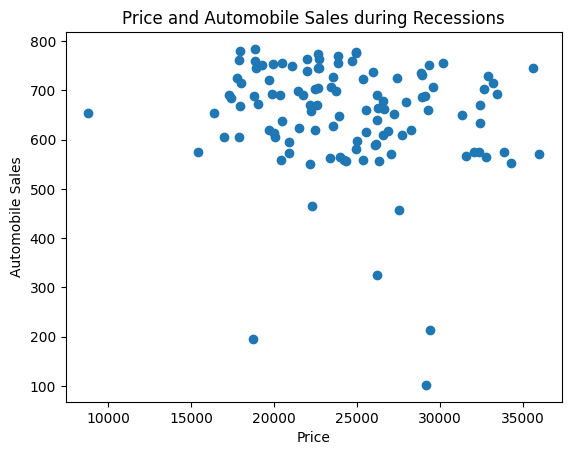

In [101]:
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.title('Price and Automobile Sales during Recessions')
plt.ylabel("Automobile Sales")
plt.xlabel("Price")

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 

In [107]:
df_pie = df.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()
df_pie

,Recession,Advertising_Expenditure
0,0,1279707
1,1,339910


In [102]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

Text(0.5, 1.0, 'Advertising Expenditure during Recession and Non-Recession Periods')

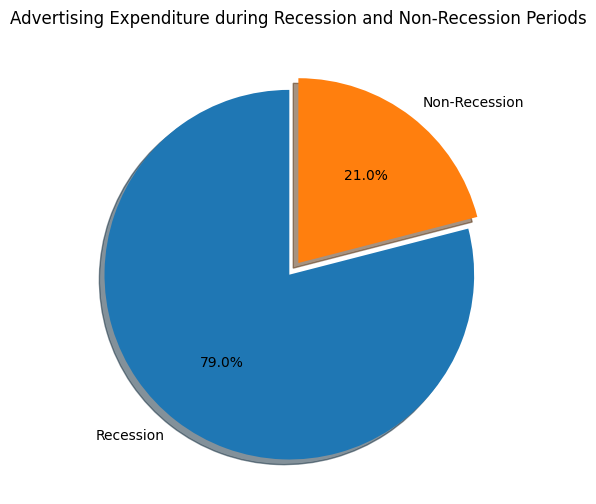

In [117]:
labels = ['Recession', 'Non-Recession']
plt.figure(figsize=(10, 6))
plt.pie(df_pie['Advertising_Expenditure'], labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.08, 0])

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total sales during recessions? 
#### Create another pie plot to display the total advertisement expenditure for each vehicle type

(-1.153066165974555,
 1.1648534810894373,
 -1.1026728516571092,
 1.1561576580483173)

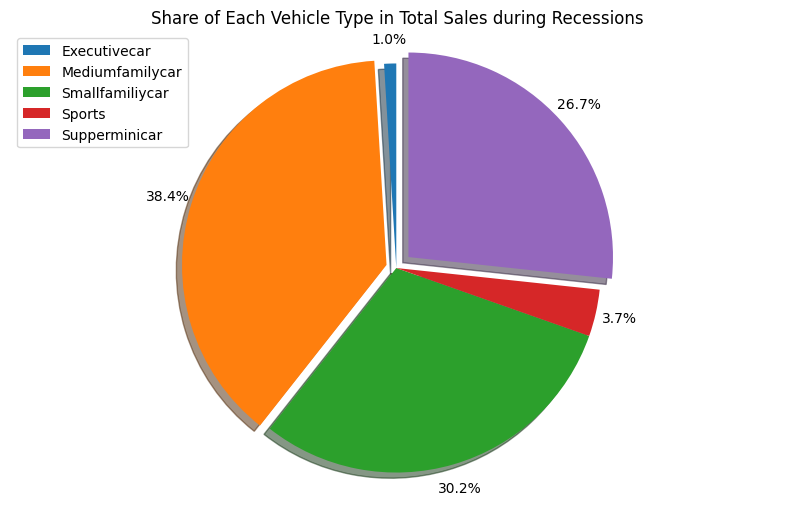

In [142]:
rec_data = df[df['Recession'] == 1]

data = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()  

plt.figure(figsize=(10, 6))
plt.pie(data['Advertising_Expenditure'], autopct='%1.1f%%', startangle=90, shadow=True, explode=[0, 0.05, 0, 0, 0.08], pctdistance=1.12)
plt.legend(labels=data['Vehicle_Type'], loc='upper left', fontsize=10) 
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.axis('equal') 

 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


C:\Users\mbama\AppData\Local\Temp\ipykernel_7536\3344152143.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales', c='red', markers='o', hue='Vehicle_Type', style='Vehicle_Type', err_style=None )


Text(0.5, 1.0, 'Effect of Unemployment Rate on Vehicle Type and Sales')

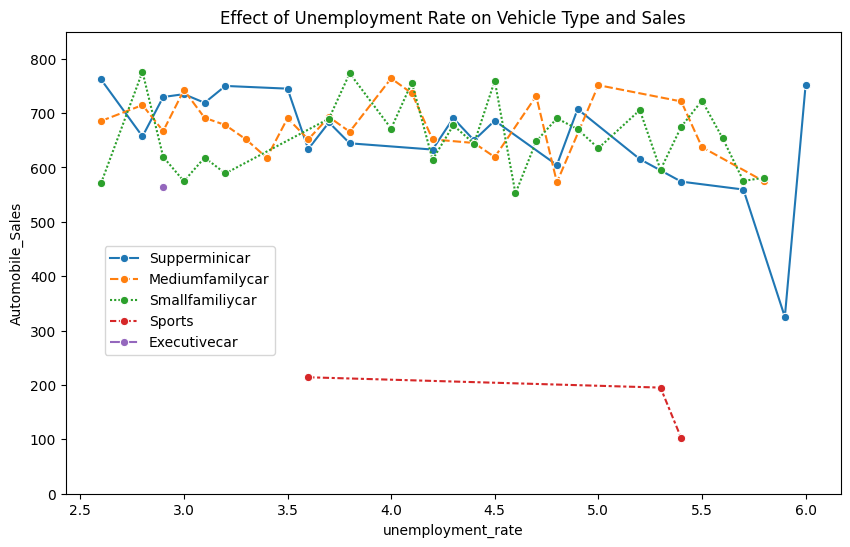

In [153]:
rec_data = df[df['Recession'] == 1]
plt.figure(figsize=(10, 6))
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales', c='red', markers='o', hue='Vehicle_Type', style='Vehicle_Type', err_style=None )

plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

<details><summary>Inference</summary>
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar<br><br>
</details>

### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [162]:
df['City'].unique()

array(['Georgia', 'New York', 'Illinois', 'California'], dtype=object)

In [159]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

df_json = pd.read_json(path)

df_json.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'id': 'AL', 'properties': ..."
1,FeatureCollection,"{'type': 'Feature', 'id': 'AK', 'properties': ..."
2,FeatureCollection,"{'type': 'Feature', 'id': 'AZ', 'properties': ..."
3,FeatureCollection,"{'type': 'Feature', 'id': 'AR', 'properties': ..."
4,FeatureCollection,"{'type': 'Feature', 'id': 'CA', 'properties': ..."


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [167]:
import requests

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

res = requests.get(path)

res.json()



{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AL',
   'properties': {'name': 'Alabama'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022, 30.318396],
    

In [174]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

df_json = pd.read_json(path)
df_json.to_json(path_or_buf='us_city.json')



In [ ]:
# Filter the data for the recession period
recession_data = df[df['Recession'] == 1]   

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# create a base nap centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data='us_city.json',
    data=sales_by_city, 
    columns=['City', 'Automobile_Sales'], 
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [17]:
# Plot 4 Develop a Bar chart for the effect of unemployment rate on vehicle type and sales
eff = df[df['Recession'] == 1]

fig = px.bar(eff, x='unemployment_rate', y='Automobile_Sales')
# fig = px.bar(eff, x='Vehicle_Type', y='Automobile_Sales', pattern_shape='unemployment_rate')
fig.show()


In [26]:
# Plot 4 Develop a Bar chart for the effect of unemployment rate on vehicle type and sales
eff = df[df['Recession'] == 1]
eff = eff.groupby('Vehicle_Type')[['unemployment_rate', 'Automobile_Sales']].mean().reset_index()

eff

fig = px.bar(eff, x='unemployment_rate', y='Automobile_Sales', color='Vehicle_Type')
# # fig = px.bar(eff, x='Vehicle_Type', y='Automobile_Sales', pattern_shape='unemployment_rate')
fig.show()